# ECE 285 Assignment 1: KNN

For this part of assignment, you are tasked to implement KNN algorithm and test it on the a subset of CIFAR10 dataset.

You sould run the whole notebook and answer the question in the notebook.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!python get_datasets.py

Done


## Prepare Dataset

Since CIFAR10 is a relative large dataset, and KNN is quite time-consuming method, we only a small sub-set of CIFAR10 for KNN part

In [4]:
from ece285.utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(subset_train=5000, subset_val=250, subset_test=500)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)


## Implementation (60%)

You need to implement the KNN method in `algorithms/knn.py`. You need to fill in the prediction function(since the training of KNN is just remembering the training set).

For KNN implementation, you are tasked to implement two version of it.

* Two Loop Version: use one loop to iterate through training samples and one loop to iterate through test samples
* One Loop Version: use one loop to iterate through test samples and use broadcast feature of numpy to calculate all the distance at once

Note: It is possible to build a Fully Vectorized Version without explicit for loop to calculate the distance, but you do not have to do it in this assignment.

For distance function, in this assignment, we use Eucliean distance between samples.

In [5]:
from ece285.algorithms import KNN

knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)


### Compare the time consumption of different method

In this section, you will test your different implementation of KNN method, and compare their speed.

In [6]:
from ece285.utils.evaluation import get_classification_accuracy

#### Two Loop Version:

In [10]:
knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)

In [11]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=2)
print("Two Loop Prediction Time:", time.time() - c_t)


test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)

shape of distance:  (500, 5000)
Distance type: <class 'list'>
Two Loop Prediction Time: 17.99294948577881
Test Accuracy: 0.272


#### One Loop Version 

In [214]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=1)
print("One Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
One Loop Prediction Time: 35.43899345397949
Test Accuracy: 0.272


**Your different implementation should output the exact same result**


## Test different Hyper-parameter(20%)

For KNN, there is only one hyper-parameter of the algorithm: How many nearest neighbour to use(**K**).

Here, you are provided the code to test different k for the same dataset.

shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>


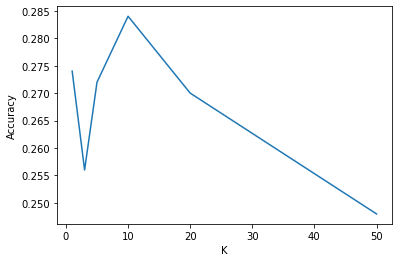

In [202]:
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


### Inline Question 1:

Please describe the output result you get, and provide some explanation as well.


### Your Answer: the accuarcy reach the maximum when K is approximate to be 11 and decrease when k increase after 11.  When K is small the accuracy may affected by the outliers. So it is indicated that outlier is relative common on such classification strategys. This probabiliy mean when including more adjacent training data, for some bordering cases, the data cluster from different labels may be included, thus increase the prediction error.



## Try different feature representation(20%)

Since machine learning method rely heavily on the feature extraction, you will see how different feature representation affect the performance of the algorithm in this section. 

You are provided the code about using **HOG** descriptor to represent samples in the notebook.

In [203]:
from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.data_processing import HOG_preprocess
from functools import partial

# Delete previous dataset to save memory
del dataset
del knn

# Use a subset of CIFAR10 for KNN assignments
hog_p_func = partial(
    HOG_preprocess,
    orientations=9,
    pixels_per_cell=(4, 4),
    cells_per_block=(1, 1),
    visualize=False,
    multichannel=True,
)
dataset = get_cifar10_data(
    feature_process=hog_p_func, subset_train=5000, subset_val=250, subset_test=500
)


Start Processing
Processing Time: 5.940002202987671


shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>
shape of distance:  (500, 5000)
Distance type: <class 'numpy.ndarray'>


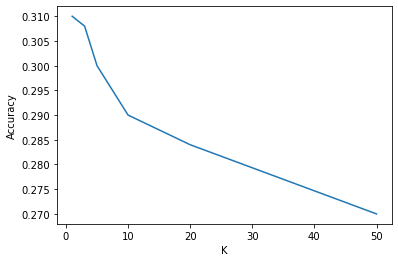

In [204]:
knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)

plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


### Inline Question 2:

Please describe the output result you get, compare with the result you get in the previous section, and provide some explanation as well.

### Your Answer: HOG has better preformance than original when k equal to 1 but when k increase, the accuarcy decrease. Such curve may indicate that the outlier is not very common so it contributed little influence on the graph, thus the strategy that takes the nearnest testing point has higher accuracy.

**Put Your Answer Here**